In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings

from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

erwarnings('ignore')



/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0664.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/1269.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3863.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2193.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0733.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3750.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2008.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2081.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0106.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/0375.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3919.jpg
/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/3

NameError: name 'erwarnings' is not defined

In [3]:
!nvidia-smi

Thu Apr 10 04:12:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

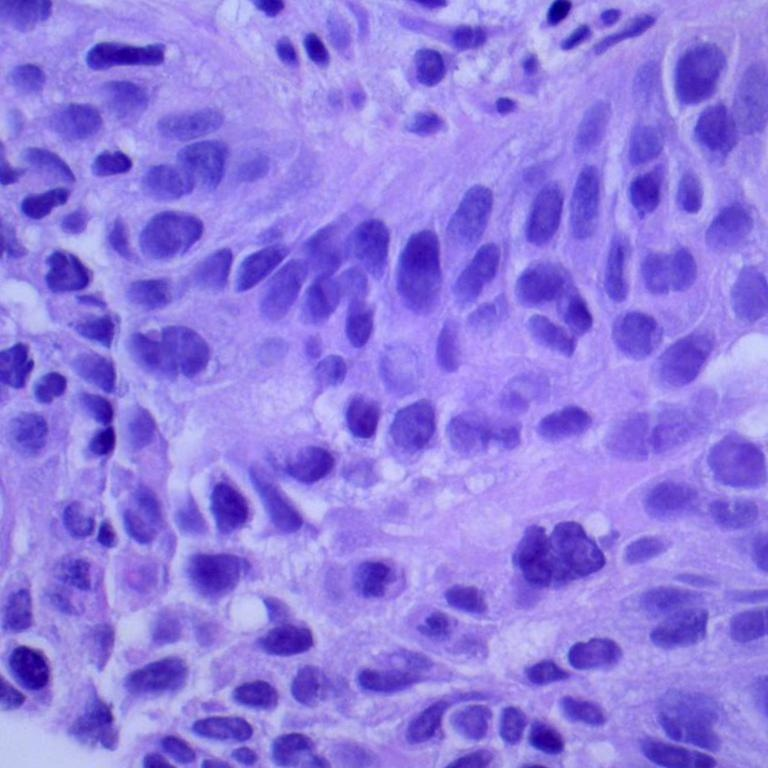

In [4]:
import PIL
image = PIL.Image.open('/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma/2193.jpg')
image

In [5]:
dir = '/kaggle/input/lung-cancer-histopathological-images'
img_width = 256
img_height = 256


In [6]:
train_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.3, subset = "training")
test_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.2, subset = "validation")
val_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.1, subset = "validation")


Found 15000 files belonging to 3 classes.
Using 10500 files for training.


I0000 00:00:1744258380.347112      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744258380.347956      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 15000 files belonging to 3 classes.
Using 3000 files for validation.
Found 15000 files belonging to 3 classes.
Using 1500 files for validation.


In [7]:
train_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.3, subset = "training")
test_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.2, subset = "validation")
val_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.1, subset = "validation")


Found 15000 files belonging to 3 classes.
Using 10500 files for training.
Found 15000 files belonging to 3 classes.
Using 3000 files for validation.
Found 15000 files belonging to 3 classes.
Using 1500 files for validation.


In [8]:
model = Sequential()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Global Pooling & Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
adam = Adam(learning_rate = 0.0001)

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,987 (2.11 MB)

 Trainable params: 552,835 (2.11 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [13]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max', verbose = 1)

In [14]:
path = '/kaggle/working/best.keras'
checkpoint = ModelCheckpoint(filepath = path, monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = 1)


In [15]:
history = model.fit(train_data, validation_data = val_data, epochs = 100, callbacks = [early_stopping, checkpoint])ls

Epoch 1/100


I0000 00:00:1744258412.210053      86 service.cc:148] XLA service 0x7cb108006aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744258412.211198      86 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744258412.211222      86 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744258412.813405      86 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/657 ━━━━━━━━━━━━━━━━━━━━ 55s 85ms/step - accuracy: 0.2812 - loss: 1.8957   

I0000 00:00:1744258423.058349      86 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8515 - loss: 0.3644
Epoch 1: val_accuracy improved from -inf to 0.92333, saving model to /kaggle/working/best.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - accuracy: 0.8516 - loss: 0.3643 - val_accuracy: 0.9233 - val_loss: 0.1702
Epoch 2/100
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9301 - loss: 0.1773
Epoch 2: val_accuracy improved from 0.92333 to 0.95000, saving model to /kaggle/working/best.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.9301 - loss: 0.1773 - val_accuracy: 0.9500 - val_loss: 0.1257
Epoch 3/100
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9400 - loss: 0.1547
Epoch 3: val_accuracy improved from 0.95000 to 0.95133, saving model to /kaggle/working/best.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.9400 - loss: 0.1547 - val_accuracy: 0.9513 - val_loss: 0.1115
Epoch 4/100
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9492 - loss: 0.1255
Epoch 4: 

In [16]:
best_model = load_model(path)

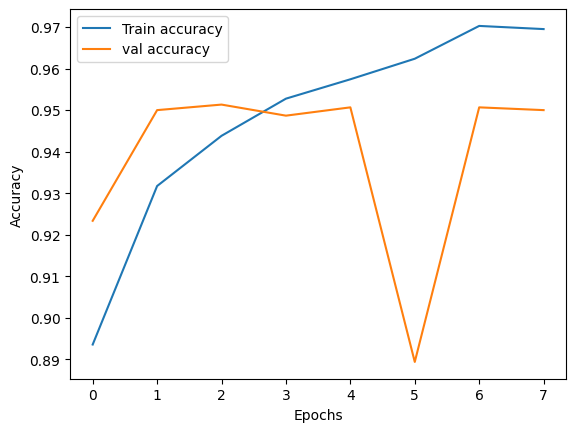

In [17]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')



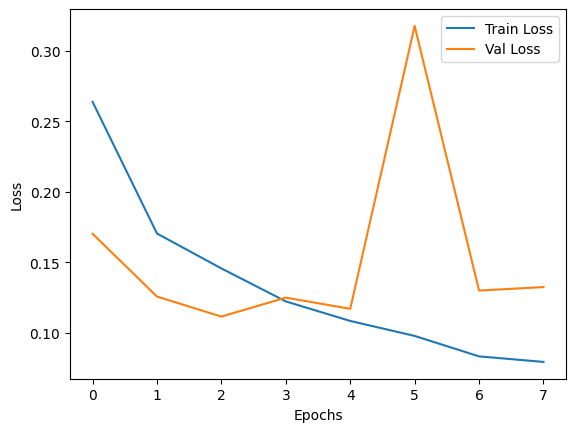

In [18]:

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')


In [19]:
import numpy as np
from sklearn.metrics import classification_report

# Extract true labels and predictions
y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate report
print(classification_report(y_true, y_pred, target_names=train_data.class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

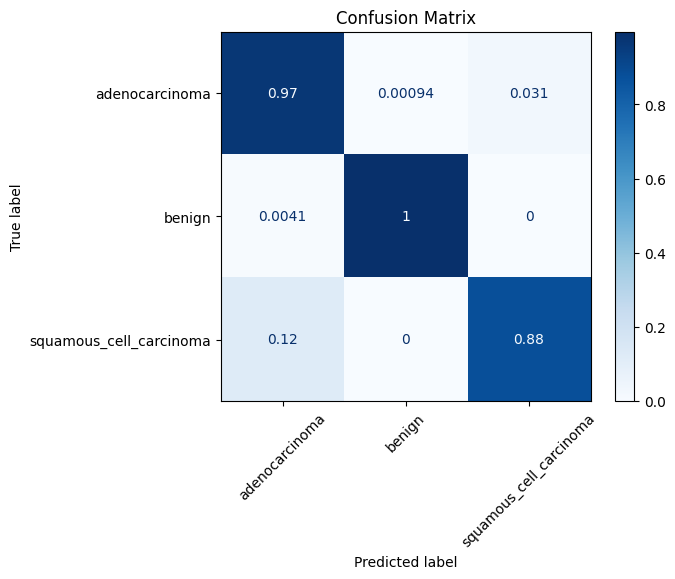

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you already have y_true and y_pred as defined earlier
# y_true = [...], y_pred = [...]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred,normalize='true')
labels = train_data.class_names  # class names from the training set

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

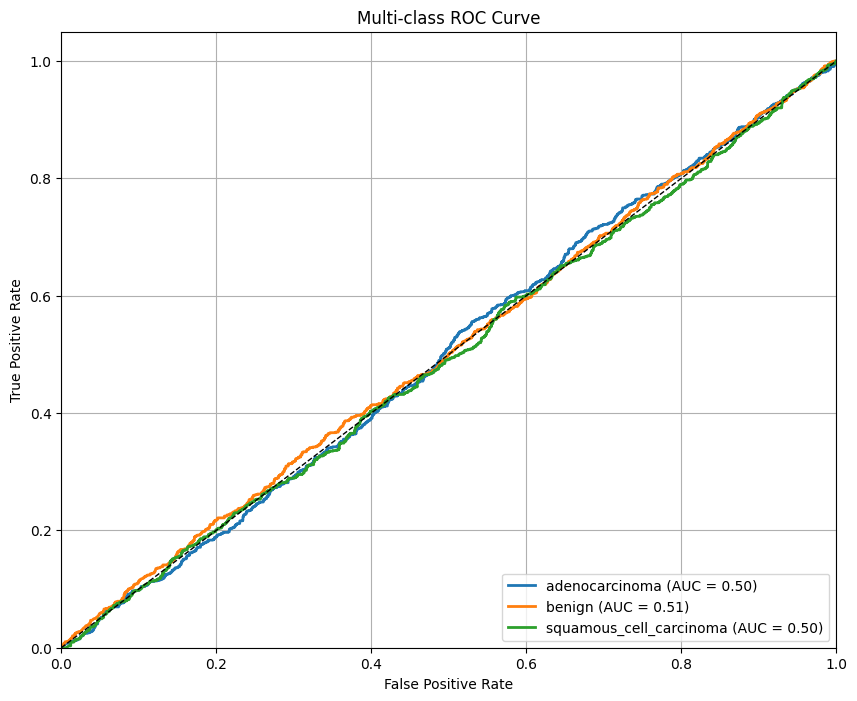

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Binarize the true labels (one-hot)
n_classes = len(train_data.class_names)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Predict probabilities (not class labels)
y_score = []
for images, _ in test_data:
    probs = model.predict(images)
    y_score.append(probs)
y_score = np.vstack(y_score)  # shape: [num_samples, n_classes]

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{train_data.class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
